In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [14]:
def ftcs_old(T0, nt, dt, dx, dy, alpha):
    """
    """
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I = int(nx / 2)
    J = int(ny / 2)
    T = T0.copy()
    for n in range(nt):
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                T[j, i] = (T[j, i] + 
                        sigma_x * (T[j, i-1] - 
                                  2 * T[j, i] + 
                                   T[j, i+1]) + 
                        sigma_y * (T[j-1, i] - 
                                  2 * T[j, i] + 
                                   T[j+1, i]))
                
        T[-1, :] = T[-2, :]
        T[:, -1] = T[:, -2]
        if T[J, I] >= 70.0:
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))
    return T

In [4]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    """
    """
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    
    T = T0.copy()
    ny, nx = T.shape
    I, J = int(nx / 2), int(ny / 2)
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] + 
                        sigma_x * (T[1:-1, 2:] - 
                                  2 * T[1:-1, 1:-1] + 
                                   T[1:-1, :-2]) + 
                        sigma_y * (T[2:, 1:-1] - 
                                  2 * T[1:-1, 1:-1] + 
                                   T[:-2, 1:-1]))
        T[-1, :] = T[-2, :]
        T[:, -1] = T[:, -2]
        
        if T[J, I] >= 70.0:
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))
    return T

In [5]:
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4

x = numpy.linspace(0.0, Lx, num = nx)
y = numpy.linspace(0.0, Ly, num = ny)

Tb = 100.0
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = Tb
T0[:, 0] = Tb

In [7]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
nt = 500

T = ftcs(T0, nt, dt, dx, dy, alpha)

[time step 256] Center at T=70.02 at t=0.16 s


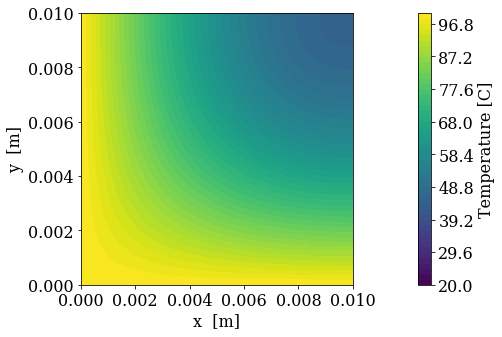

In [8]:
pyplot.figure(figsize = (8.0, 5.0))
pyplot.xlabel('x  [m]')
pyplot.ylabel('y  [m]')
levels = numpy.linspace(20.0, 100.0, num = 51)
contf = pyplot.contourf(x, y, T, levels = levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable = 'box');

In [15]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha
nt = 500

T = ftcs_old(T0, nt, dt, dx, dy, alpha)

[time step 128] Center at T=70.13 at t=0.08 s


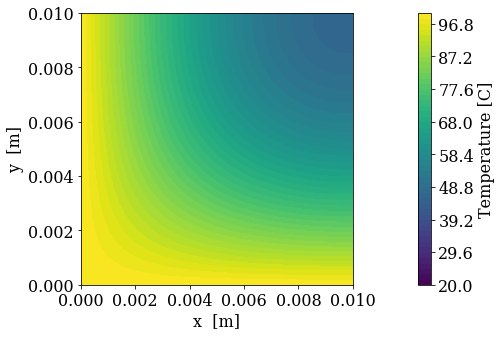

In [16]:
pyplot.figure(figsize = (8.0, 5.0))
pyplot.xlabel('x  [m]')
pyplot.ylabel('y  [m]')
levels = numpy.linspace(20.0, 100.0, num = 51)
contf = pyplot.contourf(x, y, T, levels = levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable = 'box');